### Improve also XRF Plots - match to grain size plots limits and figsize

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from grainsize import XRF

Import XRF Data in PPM, convert to percentage by divding by `factor = 10_000`, then plot for major elements (Si, Ca, Al, Mg, Fe) and for selected ratios (Si/Ca, Si/Al, Ca/Al) for both cores.

In [2]:
sr19_ppm = pd.read_csv("./data-files/xrf-files/sr19_ppm.csv", index_col=0)
sr21_ppm = pd.read_csv("./data-files/xrf-files/sr21_ppm.csv", index_col=0)

factor = 10_000
major = ["Si", "Ca", "Al", "Mg", "Fe"]
sr19 = sr19_ppm.loc[:, major] / factor
sr21 = sr21_ppm.loc[:, major] / factor

In [3]:
# create XRF objects
sr19 = XRF(dataframe=sr19)
sr21 = XRF(dataframe=sr21)

define the limits for the y-axis and x-axis to make sure the plots are comparable:

In [4]:
ylimit = max(sr19.index[-1], sr21.index[-1])
xlimit = [max(el19, el21) for el19, el21 in zip(sr19.max(), sr21.max())]

Plot major elements

In [5]:
sr21_plot_path = "./data-files/xrf-files/sr21_major.png"
sr19_plot_path = "./data-files/xrf-files/sr19_major.png"

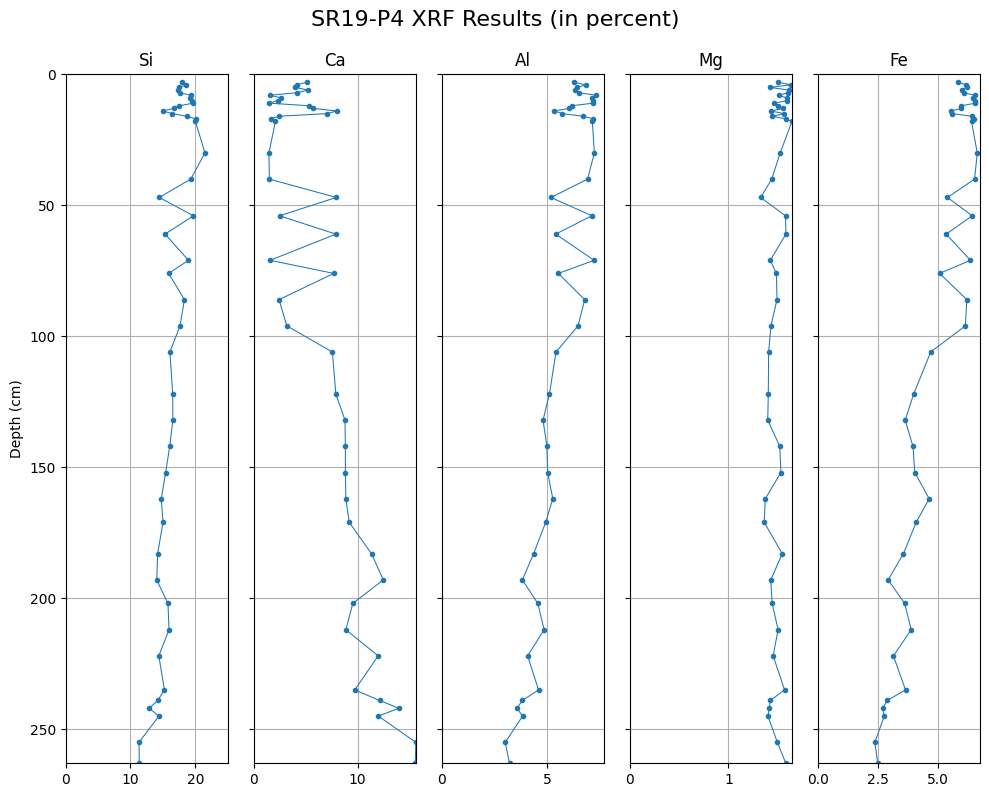

In [6]:
sr19_major = sr19.plot_elements(core_name="SR19-P4", figsize=(10, 8), rows=1, ylimit=ylimit, xlimit=xlimit, savefig=False, savepath=sr19_plot_path)

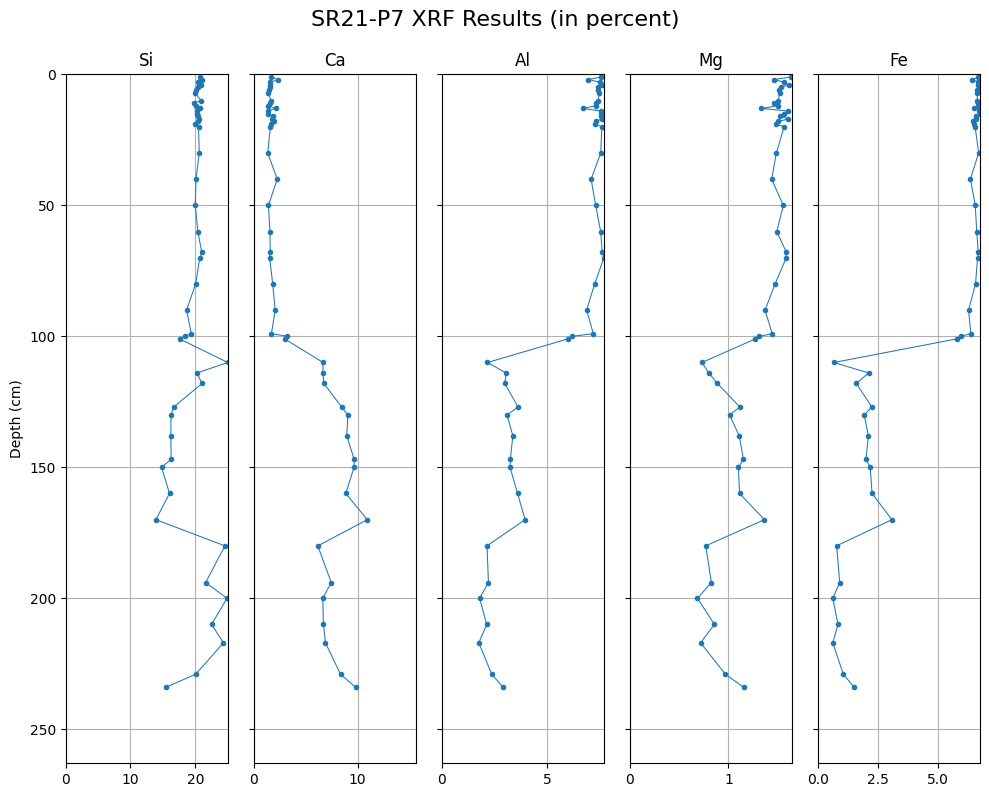

In [7]:
sr21_major = sr21.plot_elements(core_name="SR21-P7", figsize=(10, 8), rows=1, ylimit=ylimit, xlimit=xlimit, savefig=False, savepath=sr21_plot_path)

Now plot elemental ratios

In [8]:
ratios = [("Si", "Al"), ("Si", "Ca"), ("Ca", "Al")]
sr21_ratio_plot_path = "./data-files/xrf-files/sr21_ratios.png"
sr19_ratio_plot_path = "./data-files/xrf-files/sr19_ratios.png"

In [12]:
r_xlimit = [15, 15, 6]

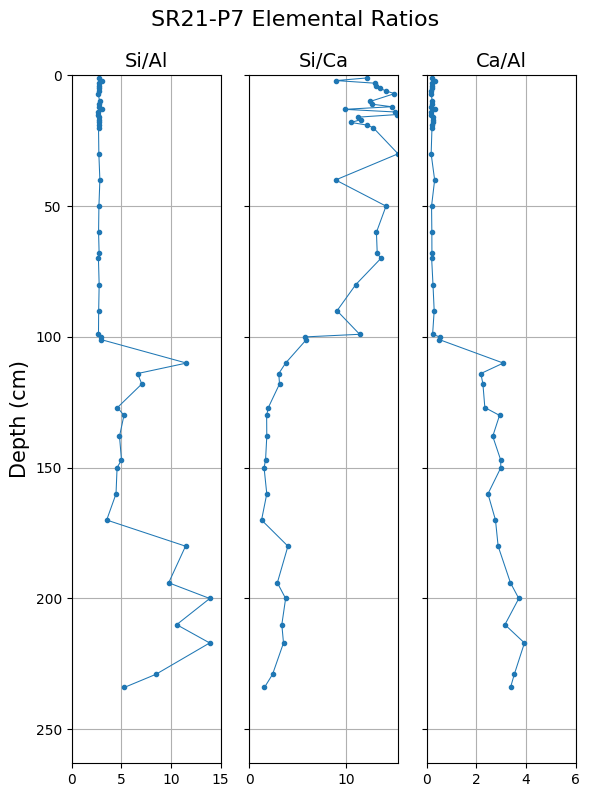

In [15]:
sr21_ratios = sr21.plot_ratios(core_name="SR21-P7", ratio_list=ratios, figsize=(6, 8),
                            ylimit=ylimit, xlimit=r_xlimit, savefig=False, savepath=sr21_ratio_plot_path)

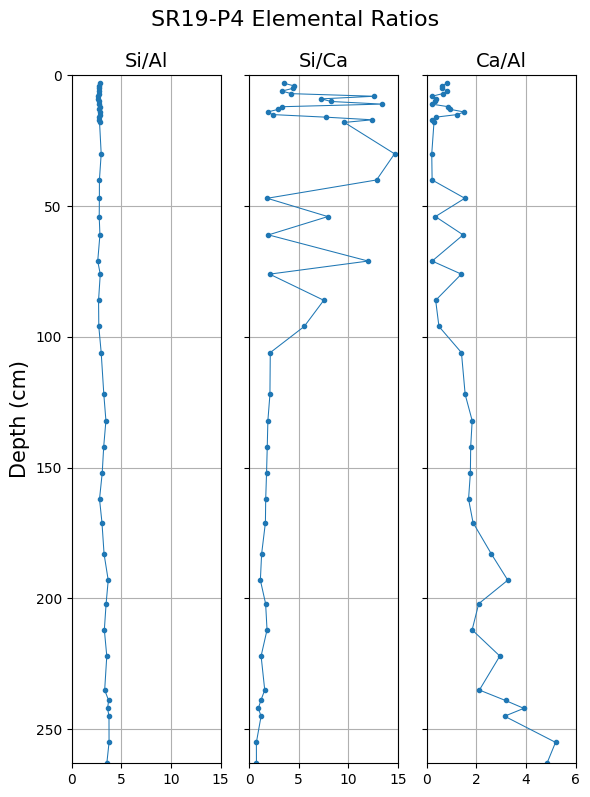

In [16]:
sr19_ratios = sr19.plot_ratios(core_name="SR19-P4", ratio_list=ratios, figsize=(6, 8), ylimit=ylimit, xlimit=r_xlimit, savefig=False, savepath=sr19_ratio_plot_path)